# Edge AI and TinyML: Deploy machine learning models on resource-constrained embedded devices

**Load required libraries**

In [1]:
import os                   #Provides functions for interacting with the OS
import warnings             # Suppressing warning messages 
import tensorflow as tf     # Python deep-learning and machine-learning framework 
import numpy as np          # Core numerical comutational library in Python
import cv2                  # Computer-vision library
import time                 # Provides functions for working with time 

2025-12-07 18:48:55.426237: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-07 18:48:55.430858: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-07 18:48:55.598799: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Load CIFAR - 10 data, benchmark for machine learning**

In [2]:

 # warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")
print("Loading CIFAR-10 data loaded")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
x_val = x_train[:5000]
y_val = y_train[:5000]

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

Loading CIFAR-10 data loaded


**Build a Convet model for TinyLM**

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, 
                    y_train, 
                    epochs=15, 
                    batch_size=50,
                   validation_data = (x_val, y_val))

/home/arif/anaconda3/envs/tinyML_Demo/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1765113539.057490    9549 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1765113539.066011    9549 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4050 - loss: 1.6322 - val_accuracy: 0.5402 - val_loss: 1.2900
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5738 - loss: 1.2045 - val_accuracy: 0.6294 - val_loss: 1.0475
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6401 - loss: 1.0258 - val_accuracy: 0.6654 - val_loss: 0.9666
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6824 - loss: 0.9080 - val_accuracy: 0.7062 - val_loss: 0.8338
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7161 - loss: 0.8194 - val_accuracy: 0.7510 - val_loss: 0.7317
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7406 - loss: 0.7497 - val_accuracy: 0.7974 - val_loss: 0.6035
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7591 - loss: 0.6919 - val_accuracy: 0.7924 - val_loss: 0.5910
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7786 - loss: 0.6394 - 

**Ploting results of the trained network**

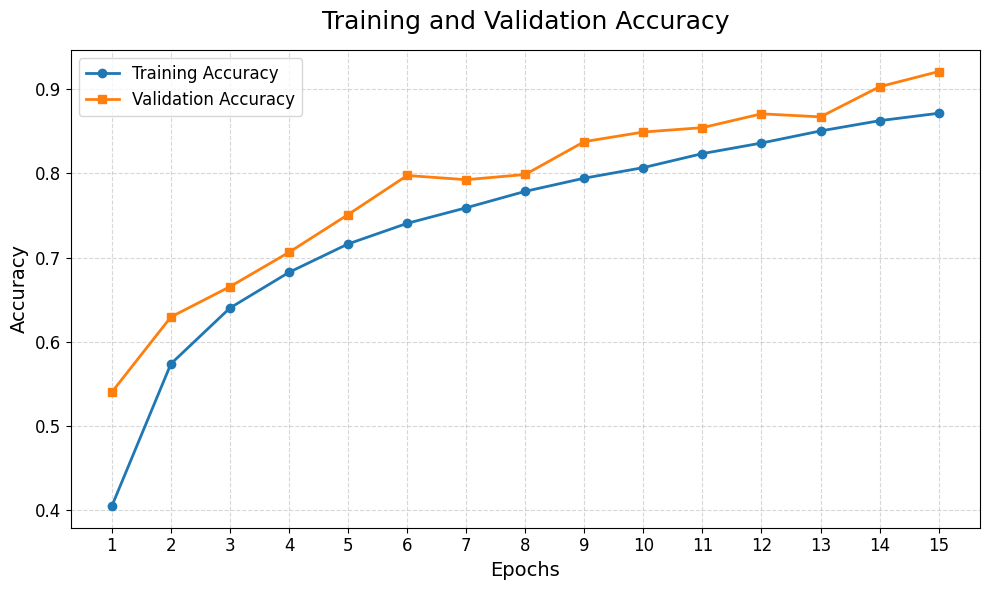

In [4]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))                          
plt.plot(epochs, acc, marker='o', linewidth=2, 
         label='Training Accuracy')
plt.plot(epochs, val_acc, marker='s', linewidth=2, 
         label='Validation Accuracy')

plt.title('Training and Validation Accuracy', fontsize=18, pad=15)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)            
plt.xticks(epochs, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Model performance on test data**

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Trained Model Accuracy on Test Data: {test_acc:.2%}")

✅ Trained Model Accuracy on Test Data: 72.39%


**Once the model is trained, the next step is to quantized the model for memory constarined embedded devices.**

# Coverting trained model to TinyML model

In [6]:
print("Quantizing to int8 (~130 KB for Embedded devices)...")

def rep_data_gen():
    for i in range(100):
        yield [x_train[i:i+1].astype(np.float32)]  # Ensures float32

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = rep_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

Quantizing to int8 (~130 KB for Embedded devices)...
INFO:tensorflow:Assets written to: /tmp/tmpqhwjhcu0/assets


INFO:tensorflow:Assets written to: /tmp/tmpqhwjhcu0/assets


Saved artifact at '/tmp/tmpqhwjhcu0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140519238935376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519238937488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239393072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239391136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239400464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239401168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239571536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239572240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239576288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140519239576992: TensorSpec(shape=(), dtype=tf.resource, name=None)


/home/arif/anaconda3/envs/tinyML_Demo/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1765113648.156353    9549 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1765113648.156364    9549 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-12-07 18:50:48.156542: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpqhwjhcu0
2025-12-07 18:50:48.156877: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-12-07 18:50:48.156880: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpqhwjhcu0
I0000 00:00:1765113648.160065    9549 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
2025-12-07 18:50:48.161329: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-

**Save the qunatized model and check the size**

In [7]:
# Save quantized model
model_path = 'cifar10_tinyml_Demo_cv2.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)

# Check size 
size_kb = len(tflite_model) / 1024
print(f"📁 Quantized Model Size: {size_kb:.1f} KB (Ready for Arduino!)")

📁 Quantized Model Size: 131.1 KB (Ready for Arduino!)


**Note: 75–150 KB, that’s perfect for TinyML boards**

Note: With this TensorFlow Lite, we can generate the .h file to use in any microcontroller (xxd -i cifar10_tinyml_Demo_cv2_BITS_Presentation.tflite > model_data.h
)

# Load the TinyML model for Live Demo 

**Load the trained model for live demo**

In [8]:
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_scale, input_zero_point = input_details[0]['quantization']
output_scale, output_zero_point = output_details[0]['quantization']

/home/arif/anaconda3/envs/tinyML_Demo/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


**Live demo with Laptop-Cam in real time**

In [ ]:
cap = cv2.VideoCapture(0)
cap.set(3, 640)  # Width
cap.set(4, 480)  # Height

print("\n🎥 cifar10_tinyml_Demo_cv2.tflite is LIVE!")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess
    img = cv2.resize(frame, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_float = img.astype(np.float32) / 255.0
    
    # Quantize correctly
    input_scale, input_zero_point = input_details[0]['quantization']
    img_q = img_float / input_scale + input_zero_point
    img_q = np.clip(img_q, 0, 255).astype(np.uint8)
    
    input_data = np.expand_dims(img_q, axis=0)
    
    # Inference
    start = time.time()
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    preds_q = interpreter.get_tensor(output_details[0]['index'])[0]
    inference_time = (time.time() - start) * 1000
    
    # Dequantize output
    output_scale, output_zero_point = output_details[0]['quantization']
    preds = (preds_q.astype(np.float32) - output_zero_point) * output_scale
    preds = np.clip(preds, 0, 1)  
    
    # Prediction
    label_idx = np.argmax(preds)
    label = labels[label_idx]
    conf = preds[label_idx] * 100
    # Display on webcam
    text = f"{label} {conf:.1f}% | {inference_time:.1f}ms"
    cv2.putText(frame, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)

    # Show top-3 predictions
    top3_idx = np.argsort(preds)[-3:][::-1]
    for i, idx in enumerate(top3_idx):
        cv2.putText(frame, f"{i+1}: {labels[idx]} {preds[idx]*100:.0f}%", 
                    (10, 80 + i*30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

    cv2.imshow("cifar10_tinyml_Demo_cv2", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print("Demo ended.")



🎥 cifar10_tinyml_Demo_cv2.tflite is LIVE!


# Recommanded RAM for Microcontroller for running  - cifar10_tinyml_Demo_cv2_BITS_Presentation.tflite

In [25]:
model_path = "cifar10_tinyml_Demo_cv2_BITS_Presentation.tflite"
file_bytes = os.path.getsize(model_path)
tensors = interpreter.get_tensor_details()
total_bytes = 0
print("\nTensors (allocated by interpreter):")
for t in tensors:
    shape = t['shape']
    dtype = np.dtype(t['dtype'])
    num_elems = int(np.prod(shape))
    bytes_sz = num_elems * dtype.itemsize
    total_bytes += bytes_sz
recommended_margin = 1.3
recommended_arena = int(total_bytes * recommended_margin)
print("\ncifar10_tinyml_Demo_cv2_BITS_Presentation.tflite - Summary:")
print(f"  ROM (model file)      : {file_bytes/1024:.1f} KB")
print(f"  Recommended RAM       : {recommended_arena/1024:.1f} KB")


Tensors (allocated by interpreter):

cifar10_tinyml_Demo_cv2_BITS_Presentation.tflite - Summary:
  ROM (model file)      : 131.1 KB
  Recommended RAM       : 229.4 KB


** Based on the above figure, some of the microcontroller board that can do the job are:
1) ESP32 (520 KB and 4-16 MB)
2) Raspberry Pi Pico (264 KB and 2 MB)
3) Arduino Nano 33 BLE Sense (256 KB and 1MB)